###  1. 数据载入和总览

In [2]:
import matplotlib as plt
%matplotlib inline
import numpy as pd
import pandas as pd
from pandas import Series,DataFrame


Bad key "text.kerning_factor" on line 4 in
D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


#### 1.1数据载入

In [3]:
%%time
contb1 = pd.read_csv('usa_elect/contb_01.csv')
contb2 = pd.read_csv('usa_elect/contb_02.csv')

contb3 = pd.read_csv('usa_elect/contb_03.csv')

Wall time: 1.36 s


In [262]:
contb1.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


#### 1.2 数据合并

pandas.merge可根据一个或多个键将不同DataFrame中的行连接起来。SQL或其他关系型数
据库的用户对此应该会比较熟悉，因为它实现的就是数据库的join操作。
pandas.concat可以沿着一条轴将多个对象堆叠到一起。
实例方法combine_first可以将重复数据拼接在一起，用一个对象中的值填充另一个对象中的缺
失值

In [5]:
contb=pd.concat([contb1,contb2,contb3], axis=0)

#### 1.3 数据预览和基本统计分析

In [6]:
contb

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11
...,...,...,...,...,...,...,...
1726,"Perry, Rick","GORMAN, CHRIS D. MR.",XX,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11
1727,"Perry, Rick","DUFFY, DAVID A. MR.",XX,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11
1728,"Perry, Rick","GRANE, BRYAN F. MR.",XX,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11
1729,"Perry, Rick","TOLBERT, DARYL MR.",XX,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11


In [7]:
contb.shape

(1001733, 7)

In [8]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cand_nm            1001733 non-null  object 
 1   contbr_nm          1001733 non-null  object 
 2   contbr_st          1001729 non-null  object 
 3   contbr_employer    988004 non-null   object 
 4   contbr_occupation  993303 non-null   object 
 5   contb_receipt_amt  1001733 non-null  float64
 6   contb_receipt_dt   1001733 non-null  object 
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [9]:
contb.describe()

,contb_receipt_amt
count,1.001733e+06
mean,2.982358e+02
std,3.749663e+03
min,-3.080000e+04
25%,3.500000e+01
50%,1.000000e+02
75%,2.500000e+02
max,2.014491e+06


### 2. 数据清洗

#### 2.1 缺失值处理

In [10]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cand_nm            1001733 non-null  object 
 1   contbr_nm          1001733 non-null  object 
 2   contbr_st          1001729 non-null  object 
 3   contbr_employer    988004 non-null   object 
 4   contbr_occupation  993303 non-null   object 
 5   contb_receipt_amt  1001733 non-null  float64
 6   contb_receipt_dt   1001733 non-null  object 
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [11]:
cond1 = contb['contbr_employer'].isnull()

In [12]:
contb[cond1]

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
41,"Bachmann, Michelle","MINNIS, RITA",CA,NaN,NaN,-1500.0,20-JUN-11
264,"Bachmann, Michelle","BISHOP, GERARD",NY,NaN,NaN,-1700.0,28-JUN-11
752,"Romney, Mitt","KNIGHT, RENA",AL,NaN,NaN,-60.0,07-MAR-12
897,"Romney, Mitt",THE STEWART FIRM L.L.C.,AL,NaN,NaN,250.0,23-MAR-12
1033,"Romney, Mitt","SELLERS, LEE",AL,NaN,NaN,-120.0,20-JAN-12
...,...,...,...,...,...,...,...
1715,"Perry, Rick",TEXAS ENERGY L.L.C.,WY,NaN,NaN,250.0,30-SEP-11
1717,"Perry, Rick","HARDER, ROBERT",WY,NaN,RETIRED,100.0,12-NOV-11
1720,"Perry, Rick","HARDER, ROBERT",WY,NaN,RETIRED,100.0,01-OCT-11
1722,"Perry, Rick","HARDER, ROBERT",WY,NaN,RETIRED,100.0,29-OCT-11


In [14]:
contb['contbr_employer'].fillna(value = 'NOT PROVIDE', inplace=True)#填充保密

In [15]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cand_nm            1001733 non-null  object 
 1   contbr_nm          1001733 non-null  object 
 2   contbr_st          1001729 non-null  object 
 3   contbr_employer    1001733 non-null  object 
 4   contbr_occupation  993303 non-null   object 
 5   contb_receipt_amt  1001733 non-null  float64
 6   contb_receipt_dt   1001733 non-null  object 
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [16]:
contb['contbr_occupation'].fillna('NOT PROVIDE', inplace=True)

In [17]:
cond2 = contb['contbr_st'].isnull()
contb[cond2]

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
453997,"Obama, Barack","NEWBURG, ANDRE",NaN,NOT EMPLOYED,RETIRED,1000.0,01-DEC-11
453998,"Obama, Barack","HARBARD, SONJA",NaN,SELF-EMPLOYED,WRITER,250.0,31-MAR-12
453999,"Obama, Barack","LAKIN-THOMAS, PATRICIA",NaN,YORK UNIVERSITY,UNIVERSITY PROFESSOR,300.0,31-MAR-12
454000,"Obama, Barack","MICHAEALS, MARNIN",NaN,BAKER & MCKENZIE ZURICH,ATTORNEY,250.0,31-MAR-12


In [18]:
contb['contbr_st'].fillna('NOT PROVIDE', inplace=True)

In [19]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cand_nm            1001733 non-null  object 
 1   contbr_nm          1001733 non-null  object 
 2   contbr_st          1001733 non-null  object 
 3   contbr_employer    1001733 non-null  object 
 4   contbr_occupation  1001733 non-null  object 
 5   contb_receipt_amt  1001733 non-null  float64
 6   contb_receipt_dt   1001733 non-null  object 
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


#### 2.2 数据转换
#### 利用字典映射进行转换：党派分析

In [20]:
contb.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


In [21]:
#通过搜索引擎等途径，获取到每个总统候选人的所属党派，建立字典parties，候选人名字作为键，所属党派作为对应的值
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

pandas中的map()方法将函数、字典索引或是一些需要接受单个输入值的特别的对象与对应的单个列的每一个元素建立联系并串行得到结果。

In [22]:
%%time
#map中可以传入字典
contb['party'] = contb['cand_nm'].map(parties)

Wall time: 58.8 ms


In [281]:
contb['party'].value_counts()

Democrat      593747
Republican    407986
Name: party, dtype: int64

In [25]:
contb.groupby('party').contb_receipt_amt.sum()

party
Democrat      1.335028e+08
Republican    1.652498e+08
Name: contb_receipt_amt, dtype: float64

In [284]:
contb.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Republican


In [26]:
#按照职业分组，查询捐钱最多的地方
grouped_occupation = contb.groupby(['contbr_occupation'])['contb_receipt_amt'].sum()

In [27]:
occupation = {'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDE',
             'INFORMATION REQUESTED':'NOT PROVIDE',
              'C.E.O':'CEO',
             'LAWYER':'ATTORNEY',
             'SELF':'SELF-EMPOYED',
             'SELF EMPLOYERD':'SELF-EMPLOYER'}


In [28]:
grouped_occupation.nlargest(50)

contbr_occupation
RETIRED                                   48176647.00
ATTORNEY                                  18470473.30
HOMEMAKER                                 17484807.65
INFORMATION REQUESTED PER BEST EFFORTS    15859514.55
INFORMATION REQUESTED                      8742357.59
PHYSICIAN                                  7224044.40
PRESIDENT                                  6347843.59
EXECUTIVE                                  5273717.90
CONSULTANT                                 4932627.98
NOT PROVIDE                                4224760.39
CEO                                        3570942.20
LAWYER                                     3537982.19
OWNER                                      3278488.16
INVESTOR                                   3204481.92
ENGINEER                                   2730527.43
PROFESSOR                                  2458033.81
C.E.O.                                     2433218.11
SELF-EMPLOYED                              2259150.94
MANAGER   

In [287]:
grouped_occupation.sort_values(ascending=False)[:50]

contbr_occupation
RETIRED                                   48176647.00
ATTORNEY                                  18470473.30
HOMEMAKER                                 17484807.65
INFORMATION REQUESTED PER BEST EFFORTS    15859514.55
INFORMATION REQUESTED                      8742357.59
PHYSICIAN                                  7224044.40
PRESIDENT                                  6347843.59
EXECUTIVE                                  5273717.90
CONSULTANT                                 4932627.98
NOT PROVIDE                                4224760.39
CEO                                        3570942.20
LAWYER                                     3537982.19
OWNER                                      3278488.16
INVESTOR                                   3204481.92
ENGINEER                                   2730527.43
PROFESSOR                                  2458033.81
C.E.O.                                     2433218.11
SELF-EMPLOYED                              2259150.94
MANAGER   

In [32]:
f = lambda x:occupation.get(x,x)
contb['contbr_occupation'] = contb['contbr_occupation'].map(f)
contb['contbr_occupation'] 

0                            RETIRED
1                            RETIRED
2                        NOT PROVIDE
3                            RETIRED
4                            RETIRED
                    ...             
1726                     NOT PROVIDE
1727                  BUSINESS OWNER
1728                     NOT PROVIDE
1729    LONGWALL MAINTENANCE FOREMAN
1730                     NOT PROVIDE
Name: contbr_occupation, Length: 1001733, dtype: object

In [289]:
grouped_occupation = contb.groupby(['contbr_occupation'])['contb_receipt_amt'].sum()
grouped_occupation.sort_values(ascending=False)[:50]

contbr_occupation
RETIRED                  48176647.00
NOT PROVIDE              28826632.53
ATTORNEY                 22008455.49
HOMEMAKER                17484807.65
PHYSICIAN                 7224044.40
PRESIDENT                 6347843.59
EXECUTIVE                 5273717.90
CONSULTANT                4932627.98
CEO                       3594443.20
OWNER                     3278488.16
INVESTOR                  3204481.92
ENGINEER                  2730527.43
PROFESSOR                 2458033.81
C.E.O.                    2433218.11
SELF-EMPLOYED             2259150.94
MANAGER                   2167571.47
REAL ESTATE               2110499.34
SALES                     1814901.82
NOT EMPLOYED              1752927.93
BUSINESS OWNER            1736511.73
TEACHER                   1709754.05
CHAIRMAN                  1691595.37
STUDENT                   1679435.28
FINANCE                   1664021.31
BANKER                    1462903.13
WRITER                    1303267.29
PARTNER             

#### 排序：按照职业汇总对赞助总金额进行排序

按照职位进行汇总，计算赞助总金额，展示前20项，发现不少职业是相同的，只不过是表达不一样而已，如C.E.O.与CEO，都是一个职业

#### 利用函数进行数据转换：职业与雇主信息分析


，把相同职业的不同表达映射为对应的职业，比如把C.E.O.映射为CEO

In [33]:
contb.columns


Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')

In [291]:
employer = {'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDE',
           'INFORMATION REQUESTED':'NOT PROVIDE',
           'SELF':'SELF-EMPLOYERD',
           'SELF EMPLOYED':'SELF-EMPLOYERD'}

In [34]:
contb['contbr_employer'] = contb['contbr_employer'].map(f)

In [35]:
#按照公司进行统计
contb.groupby(['contbr_employer'])['contb_receipt_amt'].sum().sort_values(ascending = False)

contbr_employer
RETIRED             41374333.67
NOT PROVIDE         31281997.76
SELF-EMPLOYED       28745318.28
HOMEMAKER           14738524.86
NOT EMPLOYED         8636809.43
                       ...     
RESTAURANT             -2225.00
COATS & EVANS PC       -2500.00
DREDGING               -2500.00
TANGO TRANSPORT        -2500.00
VECTRA                 -2500.00
Name: contb_receipt_amt, Length: 135648, dtype: float64

#### 2.3 数据筛选

赞助金额筛选

In [36]:
#捐赠金额大于0
contb_= contb[contb['contb_receipt_amt']>0]
contb_.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",AL,NOT PROVIDE,NOT PROVIDE,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Republican


In [295]:
contb_.shape

(991477, 8)

In [296]:
#查看个候选人获取的赞助金
cand_nm_amt = contb_.groupby(['cand_nm'])['contb_receipt_amt'].sum().sort_values(ascending = False)

<AxesSubplot:xlabel='cand_nm'>

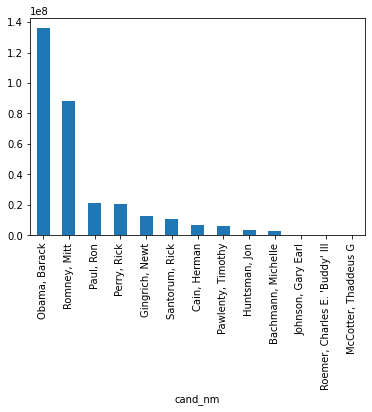

In [297]:
cand_nm_amt.plot(kind = 'bar')

In [298]:
contb_.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [38]:
contb_

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",AL,NOT PROVIDE,NOT PROVIDE,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Republican
...,...,...,...,...,...,...,...,...
1726,"Perry, Rick","GORMAN, CHRIS D. MR.",XX,NOT PROVIDE,NOT PROVIDE,5000.0,29-SEP-11,Republican
1727,"Perry, Rick","DUFFY, DAVID A. MR.",XX,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,Republican
1728,"Perry, Rick","GRANE, BRYAN F. MR.",XX,NOT PROVIDE,NOT PROVIDE,500.0,29-SEP-11,Republican
1729,"Perry, Rick","TOLBERT, DARYL MR.",XX,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,Republican


In [37]:
contb_['cand_nm']

0       Bachmann, Michelle
1       Bachmann, Michelle
2       Bachmann, Michelle
3       Bachmann, Michelle
4       Bachmann, Michelle
               ...        
1726           Perry, Rick
1727           Perry, Rick
1728           Perry, Rick
1729           Perry, Rick
1730           Perry, Rick
Name: cand_nm, Length: 991477, dtype: object

In [39]:
#选取候选人为Obama,Romney的子集数据
# 方式一：
cond1 = contb_['cand_nm'] == 'Obama, Barack'
cond2 = contb_['cand_nm'] == 'Romney, Mitt'
cond = cond1 | cond2
contb_vs = contb_[cond]
contb_vs

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican
...,...,...,...,...,...,...,...,...
201381,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,Democrat
201382,"Obama, Barack","TAITANO, TYRONE",ZZ,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,Democrat
201383,"Obama, Barack","TUCKER, PAMELA",ZZ,DODEA,EDUCATOR,3.0,20-JAN-12,Democrat
201384,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,Democrat


In [40]:
#方式二
contb_vs2 = contb_.query("cand_nm == 'Obama, Barack' or cand_nm == 'Romney, Mitt'")
contb_vs.shape

(694283, 8)

In [41]:
#方式三
cond =  contb_['cand_nm'].isin(['Romney, Mitt','Obama, Barack'])
contb_vs3 = contb_[cond]

In [42]:
contb_vs3.shape

(694283, 8)

#### 2.4 面元化数据

接下来我们对该数据做另一种非常实用的分析，利用cut函数根据出资额大小将数据离散化到多个面元中

In [43]:

contb_.contb_receipt_amt.sort_values(ascending=False)

325136    2014490.51
326651    1944042.43
344539    1679114.65
344419    1511192.17
319478     526246.17
             ...    
345490          0.01
345478          0.01
334899          0.01
334913          0.01
319831          0.01
Name: contb_receipt_amt, Length: 991477, dtype: float64

In [305]:
contb_.contb_receipt_amt.sort_values()

323688          0.01
327537          0.01
327468          0.01
326458          0.01
317091          0.01
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 991477, dtype: float64

In [44]:
contb_['contb_receipt_amt'].max()

2014490.51

In [45]:
contb_['contb_receipt_amt'][:20]

0      250.0
1       50.0
2      250.0
3      250.0
4      300.0
5      500.0
6      250.0
7      250.0
8      250.0
9      250.0
10     250.0
11     500.0
12     250.0
13     250.0
14     250.0
15     300.0
16     500.0
17    1000.0
18     250.0
19     300.0
Name: contb_receipt_amt, dtype: float64

In [54]:
bins = [0,1,10,100,1000,10000,100000,1000000,10000000]
labels = pd.cut(contb_['contb_receipt_amt'], bins)
labels.plot()

0         (100, 1000]
1           (10, 100]
2         (100, 1000]
3         (100, 1000]
4         (100, 1000]
            ...      
1726    (1000, 10000]
1727    (1000, 10000]
1728      (100, 1000]
1729      (100, 1000]
1730    (1000, 10000]
Name: contb_receipt_amt, Length: 991477, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [140]:
labels = pd.cut(contb_vs['contb_receipt_amt'], bins)


### 3. 数据聚合与分组运算

#### 3.1 透视表(pivot_table)分析党派和职业

In [55]:
contb_.columns

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')

In [56]:
#按照党派，职业对赞助金额进行汇总，类似excel中的透视表操作，聚合函数为sum
ret = contb_.pivot_table('contb_receipt_amt', index='contbr_occupation', columns = 'party', aggfunc='sum')
ret

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


In [311]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45064 entries,    MIXED-MEDIA ARTIST / STORYTELLER to ~
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Democrat    29164 non-null  float64
 1   Republican  21078 non-null  float64
dtypes: float64(2)
memory usage: 1.0+ MB


In [57]:
ret.sum(axis = 1).sort_values(ascending = False).index

Index(['RETIRED', 'NOT PROVIDE', 'ATTORNEY', 'HOMEMAKER', 'PHYSICIAN',
       'PRESIDENT', 'EXECUTIVE', 'CONSULTANT', 'CEO', 'OWNER',
       ...
       'IFC CONTRACTING SOLUTIONS', 'LEAD UI/UX DEVELOPER', 'POLICY/ LAWYER',
       'LAN/WAN ANALYST', 'REMODELER & SEMI RETIRED',
       'SPRINKLER FITTER FIRE PROTECTION SPECI',
       'AFFORDABLE REAL ESTATE DEVELOPER', 'INDEPENDENT PROFESSIONAL',
       'VICE PRESIDENT, REAL ESTATE', 'FREELANCE VOICE-OVER'],
      dtype='object', name='contbr_occupation', length=45064)

In [59]:
index = Series(ret.sum(axis = 1).sort_values(ascending = False).index)

In [61]:
index.shape

(45064,)

In [62]:
ret.shape

(45064, 2)

In [63]:
ret[index]

KeyError: "None of [Index(['RETIRED', 'NOT PROVIDE', 'ATTORNEY', 'HOMEMAKER', 'PHYSICIAN',\n       'PRESIDENT', 'EXECUTIVE', 'CONSULTANT', 'CEO', 'OWNER',\n       ...\n       'IFC CONTRACTING SOLUTIONS', 'LEAD UI/UX DEVELOPER', 'POLICY/ LAWYER',\n       'LAN/WAN ANALYST', 'REMODELER & SEMI RETIRED',\n       'SPRINKLER FITTER FIRE PROTECTION SPECI',\n       'AFFORDABLE REAL ESTATE DEVELOPER', 'INDEPENDENT PROFESSIONAL',\n       'VICE PRESIDENT, REAL ESTATE', 'FREELANCE VOICE-OVER'],\n      dtype='object', name='party', length=45064)] are in the [columns]"

In [ ]:
ret.take(ret.sum(axis = 1).sort_values(ascending = False).index)

In [64]:
ret.sum(axis = 1).sort_values(ascending = False)[:20]

contbr_occupation
RETIRED           48866560.87
NOT PROVIDE       34696802.16
ATTORNEY          22170880.59
HOMEMAKER         17883151.58
PHYSICIAN          7329445.18
PRESIDENT          6599433.71
EXECUTIVE          5494011.14
CONSULTANT         5004638.16
CEO                3715043.20
OWNER              3409854.28
INVESTOR           3315901.92
ENGINEER           2769899.25
C.E.O.             2594673.11
PROFESSOR          2461773.81
SELF-EMPLOYED      2312645.94
MANAGER            2207415.59
REAL ESTATE        2154804.34
SALES              1848351.82
CHAIRMAN           1792639.75
BUSINESS OWNER     1773321.73
dtype: float64

In [66]:
ret

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


In [65]:
ret['Democrat']

contbr_occupation
   MIXED-MEDIA ARTIST / STORYTELLER     100.0
 AREA VICE PRESIDENT                    250.0
 RESEARCH ASSOCIATE                     100.0
 TEACHER                                500.0
 THERAPIST                             3900.0
                                        ...  
ZOOKEEPER                                35.0
ZOOLOGIST                               400.0
ZOOLOGY EDUCATION                        25.0
\NONE\                                    NaN
~                                         NaN
Name: Democrat, Length: 45064, dtype: float64

In [67]:
ret['total'] =ret.fillna(0)['Democrat'] + ret.fillna(0)['Republican']

In [68]:
ret.sort_values(by = 'total', ascending = False)

party,Democrat,Republican,total
contbr_occupation,,,
RETIRED,25305316.38,23561244.49,48866560.87
NOT PROVIDE,13725187.32,20971614.84,34696802.16
ATTORNEY,14302461.84,7868418.75,22170880.59
HOMEMAKER,4248875.80,13634275.78,17883151.58
PHYSICIAN,3735124.94,3594320.24,7329445.18
...,...,...,...
SPRINKLER FITTER FIRE PROTECTION SPECI,3.00,NaN,3.00
AFFORDABLE REAL ESTATE DEVELOPER,NaN,3.00,3.00
INDEPENDENT PROFESSIONAL,NaN,3.00,3.00


In [89]:
cond = ret['total'] > 2000000
ret_big = ret[cond]
ret_big.total.sort_values(ascending=False)

contbr_occupation
RETIRED          48866560.87
NOT PROVIDE      34696802.16
ATTORNEY         22170880.59
HOMEMAKER        17883151.58
PHYSICIAN         7329445.18
PRESIDENT         6599433.71
EXECUTIVE         5494011.14
CONSULTANT        5004638.16
CEO               3715043.20
OWNER             3409854.28
INVESTOR          3315901.92
ENGINEER          2769899.25
C.E.O.            2594673.11
PROFESSOR         2461773.81
SELF-EMPLOYED     2312645.94
MANAGER           2207415.59
REAL ESTATE       2154804.34
Name: total, dtype: float64

In [69]:
#过滤掉赞助金额小于200w的数据
cond = ret['total'] < 2000000

index = ret[cond].index

ret_rich = ret.drop(labels=index)
ret_rich.total.sort_values(ascending=True)

contbr_occupation
REAL ESTATE       2154804.34
MANAGER           2207415.59
SELF-EMPLOYED     2312645.94
PROFESSOR         2461773.81
C.E.O.            2594673.11
ENGINEER          2769899.25
INVESTOR          3315901.92
OWNER             3409854.28
CEO               3715043.20
CONSULTANT        5004638.16
EXECUTIVE         5494011.14
PRESIDENT         6599433.71
PHYSICIAN         7329445.18
HOMEMAKER        17883151.58
ATTORNEY         22170880.59
NOT PROVIDE      34696802.16
RETIRED          48866560.87
Name: total, dtype: float64

In [98]:
ret_rich

party,Democrat,Republican,total
contbr_occupation,,,
ATTORNEY,14302461.84,7868418.75,22170880.59
C.E.O.,1690.00,2592983.11,2594673.11
CEO,2074284.79,1640758.41,3715043.20
CONSULTANT,2459912.71,2544725.45,5004638.16
ENGINEER,951525.55,1818373.70,2769899.25
EXECUTIVE,1355161.05,4138850.09,5494011.14
HOMEMAKER,4248875.80,13634275.78,17883151.58
INVESTOR,884133.00,2431768.92,3315901.92
MANAGER,762883.22,1444532.37,2207415.59


In [112]:
ret_rich.index

Index(['ATTORNEY', 'C.E.O.', 'CEO', 'CONSULTANT', 'ENGINEER', 'EXECUTIVE',
       'HOMEMAKER', 'INVESTOR', 'MANAGER', 'NOT PROVIDE', 'OWNER', 'PHYSICIAN',
       'PRESIDENT', 'PROFESSOR', 'REAL ESTATE', 'RETIRED', 'SELF-EMPLOYED'],
      dtype='object', name='contbr_occupation')

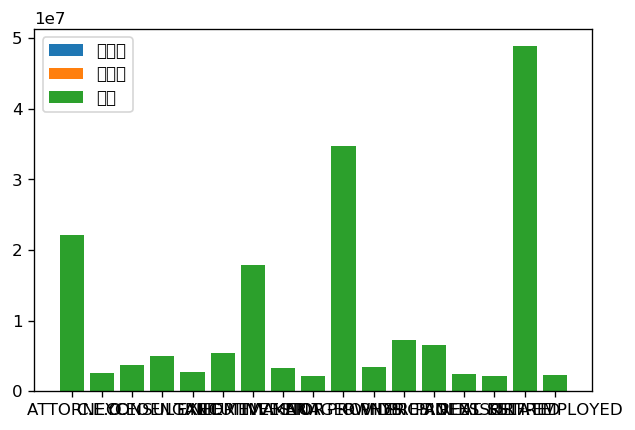

In [118]:
plt.figure(figsize=(6, 4), dpi=120)
# 通过横坐标的偏移，让两组数据对应的柱子分开
# width参数控制柱子的粗细，label参数为柱子添加标签
plt.bar(ret_rich.index,ret_rich.Democrat,label='民主党')
plt.bar(ret_rich.index,ret_rich.Republican,label='共和党')
plt.bar(ret_rich.index,ret_rich.total,label='总和')
# 定制显示图例
plt.legend()

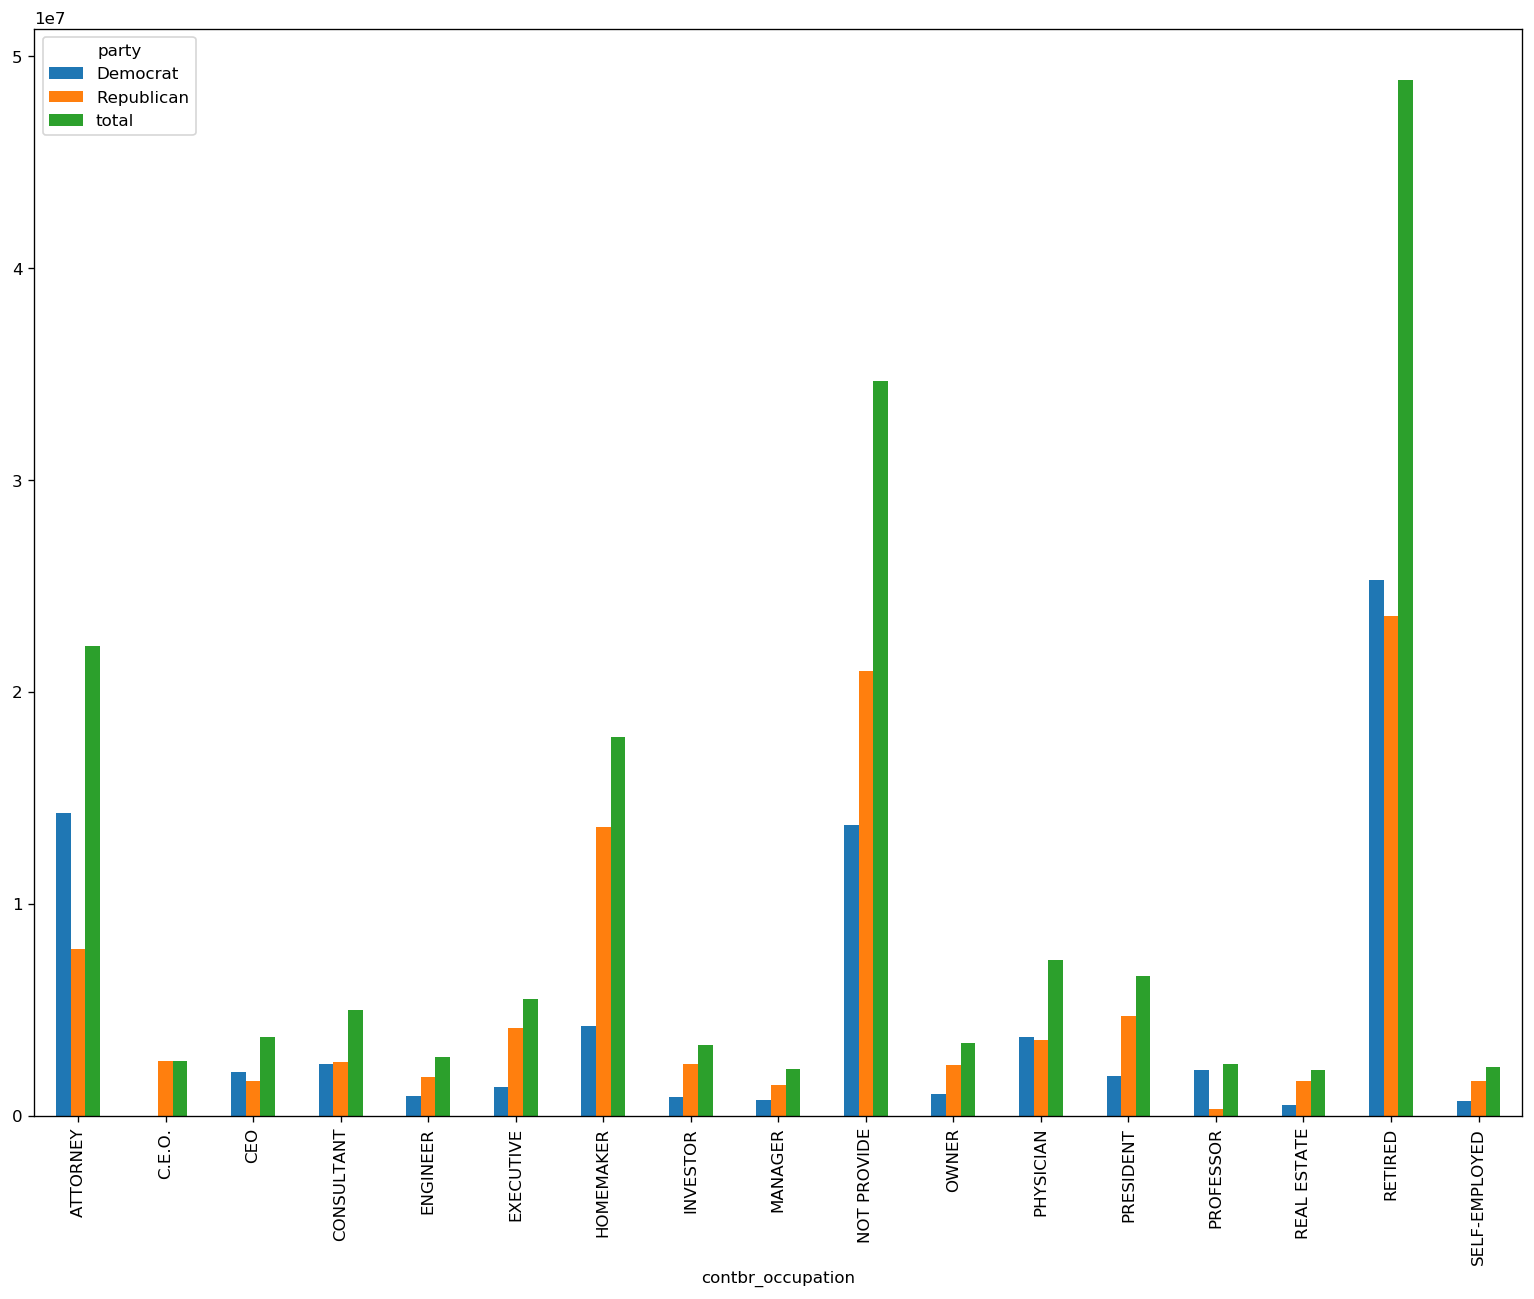

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 12),dpi=120)
ax = plt.subplot(1,1,1)
ret_rich.plot(kind = 'bar', ax = ax)

#### 3.2分组级运算的转换

根据职业与雇主信息分组运算

In [129]:
grouped = contb_.groupby('cand_nm')

In [131]:
#由于职业和雇主的处理非常相似，我们定义函数get_top_rich()对两个字段分析处理
def get_top_rich(grouped,key,n):
    # !!! 先分组，grouped,然后继续再分
    return grouped.groupby(key)['contb_receipt_amt'].sum().sort_values(ascending = False)[:n]
grouped = contb_.groupby('cand_nm')
grouped.apply(get_top_rich,'contbr_occupation',7)

cand_nm             contbr_occupation                   
Bachmann, Michelle  RETIRED                                 854785.17
                    NOT PROVIDE                             167705.00
                    HOMEMAKER                               105622.00
                    PHYSICIAN                                77319.00
                    PRESIDENT                                68831.00
                                                              ...    
Santorum, Rick      NOT PROVIDE                             968723.54
                    INFORMATION REQUESTED (BEST EFFORTS)    328323.63
                    PHYSICIAN                               314755.19
                    ATTORNEY                                293465.58
                    EXECUTIVE                               254517.55
Name: contb_receipt_amt, Length: 91, dtype: float64

In [132]:
grouped = contb_vs.groupby('cand_nm')
grouped.apply(get_top_rich, 'contbr_occupation', 7)

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305316.38
               ATTORNEY             14302461.84
               NOT PROVIDE          13725187.32
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               CONSULTANT            2459912.71
               PROFESSOR             2165071.08
Romney, Mitt   NOT PROVIDE          11638509.84
               RETIRED              11508473.59
               HOMEMAKER             8147446.22
               ATTORNEY              5372424.02
               PRESIDENT             2491244.89
               EXECUTIVE             2300947.03
               C.E.O.                1968386.11
Name: contb_receipt_amt, dtype: float64

In [133]:
for i in grouped:
    print(i)

('Obama, Barack',               cand_nm            contbr_nm contbr_st  \
107640  Obama, Barack        BARNARD, ERIC        AA   
107641  Obama, Barack       HESTER, COREEN        AA   
107642  Obama, Barack  ST. HILAIRE, PIERRE        AA   
107643  Obama, Barack  BRIDGEWATER, PAMELA        AA   
107647  Obama, Barack        BARNARD, ERIC        AA   
...               ...                  ...       ...   
201381  Obama, Barack       MOUNTS, ROBERT        ZZ   
201382  Obama, Barack      TAITANO, TYRONE        ZZ   
201383  Obama, Barack       TUCKER, PAMELA        ZZ   
201384  Obama, Barack       MOUNTS, ROBERT        ZZ   
201385  Obama, Barack          NEAL, AMBER        ZZ   

                               contbr_employer  \
107640                          U.S. AIR FORCE   
107641           THE AMERICAN SCHOOL IN LONDON   
107642                US DEPARTMENT OF JUSTICE   
107643                          DEPT. OF STATE   
107647                          U.S. AIR FORCE   
...      

从数据可以看出，Obama更受精英群体（律师、医生、咨询顾问）的欢迎，Romney则得到更多企业家或企业高管的支持

In [135]:
#同样的，使用get_top_rich()对雇主进行分析处理
grouped.apply(get_top_rich, 'contbr_employer', 7)


cand_nm        contbr_employer
Obama, Barack  RETIRED            22694558.85
               SELF-EMPLOYED      17080985.96
               NOT PROVIDE        13883494.03
               NOT EMPLOYED        8586308.70
               HOMEMAKER           2605408.54
               SELF-EMPOYED        1076531.20
               SELF EMPLOYED        469290.00
Romney, Mitt   NOT PROVIDE        12321731.24
               RETIRED            11506225.71
               HOMEMAKER           8147196.22
               SELF-EMPLOYED       7409860.98
               STUDENT              496490.94
               CREDIT SUISSE        281150.00
               MORGAN STANLEY       267266.00
Name: contb_receipt_amt, dtype: float64

Obama：微软、盛德国际律师事务所； Romney：瑞士瑞信银行、摩根斯坦利、高盛公司、巴克莱资本、H.I.G.资本

-----------------------------------------------------------

对赞助金额进行分组分析(matplotlib画图)

前面我们已经利用pd.cut()函数，根据出资额大小将数据离散化到多个面元中，接下来我们就要对每个离散化的面元进行分组分析

首先统计各出资区间的赞助笔数，这里用到unstack()，stack()函数是堆叠，unstack()函数就是不要堆叠，即把多层索引变为表格数据

In [136]:
contb_vs

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican
...,...,...,...,...,...,...,...,...
201381,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,Democrat
201382,"Obama, Barack","TAITANO, TYRONE",ZZ,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,Democrat
201383,"Obama, Barack","TUCKER, PAMELA",ZZ,DODEA,EDUCATOR,3.0,20-JAN-12,Democrat
201384,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,Democrat


接下来，我们再统计各区间的赞助金额

In [141]:
contb_vs.groupby(['cand_nm'])['contb_receipt_amt'].size()

cand_nm
Obama, Barack    589128
Romney, Mitt     105155
Name: contb_receipt_amt, dtype: int64

In [142]:
contb_vs.groupby(['cand_nm', labels]).size().unstack(level = 0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153992,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [143]:
amt_vs = contb_vs.groupby(['cand_nm',labels]).sum().unstack(level = 0, fill_value=0)
amt_vs.fillna(0, inplace = True)

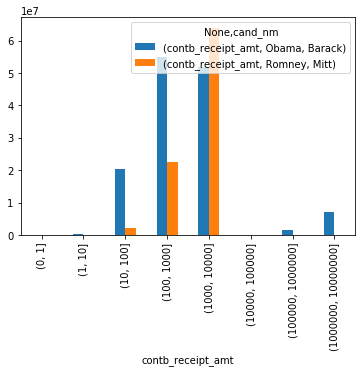

In [145]:
amt_vs.plot(kind = 'bar')

可以看出，小额赞助方面，Obama获得的数量和金额比Romney多得多

In [148]:
cond = contb_vs.contb_receipt_amt>100000
contb_vs[cond]

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
257270,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,DC,NOT PROVIDE,NOT PROVIDE,451726.00,30-JUN-11,Democrat
319478,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDE,NOT PROVIDE,526246.17,30-APR-12,Democrat
325136,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDE,NOT PROVIDE,2014490.51,29-FEB-12,Democrat
326651,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDE,NOT PROVIDE,1944042.43,31-DEC-11,Democrat
335187,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDE,NOT PROVIDE,512710.91,31-JAN-12,Democrat
344419,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDE,NOT PROVIDE,1511192.17,30-SEP-11,Democrat
344539,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NOT PROVIDE,NOT PROVIDE,1679114.65,31-MAR-12,Democrat


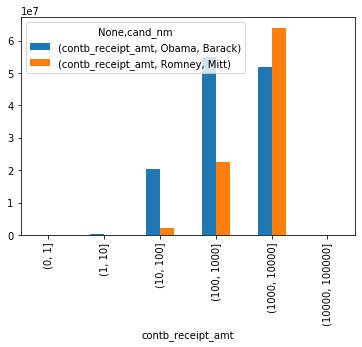

In [149]:
amt_vs[:-2].plot(kind = 'bar')

上图虽然可以大概看出Obama、Rommeny的赞助金额区间分布，但对比并不够突出，如果用百分比堆积图效果更好

In [387]:
amt_vs

contb_receipt_amt             
cand_nm                 Obama, Barack Romney, Mitt
contb_receipt_amt                                 
(0, 1]                         318.24        77.00
(1, 10]                     337267.62     29819.66
(10, 100]                 20288981.41   1987783.76
(100, 1000]               54798731.46  22363381.69
(1000, 10000]             51753705.67  63942145.42
(10000, 100000]              59100.00     12700.00
(100000, 1000000]          1490683.08         0.00
(1000000, 10000000]        7148839.76         0.00

In [150]:
amt_vs.sum(axis = 1)

contb_receipt_amt
(0, 1]                 3.952400e+02
(1, 10]                3.670873e+05
(10, 100]              2.227677e+07
(100, 1000]            7.716211e+07
(1000, 10000]          1.156959e+08
(10000, 100000]        7.180000e+04
(100000, 1000000]      1.490683e+06
(1000000, 10000000]    7.148840e+06
dtype: float64

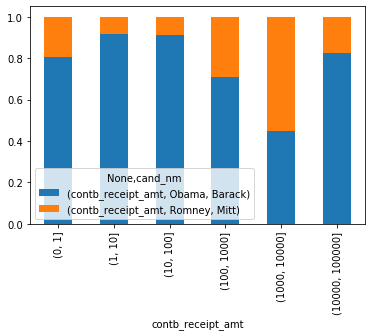

In [158]:
# 算出每个区间两位候选人收到赞助金总额的占比
#百分比堆积图
amt_vs.div(amt_vs.sum(axis = 1),axis=0)[:-2].plot(kind = 'bar', stacked = True)

按照赞助人姓名分组计数，计算重复赞助次数最多的前20人

### 4.时间处理

#### 4.1 str转datetime

In [159]:
contb_vs.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican


In [160]:
contb_vs.dtypes

cand_nm               object
contbr_nm             object
contbr_st             object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
party                 object
dtype: object

In [161]:
contb_vs['contb_receipt_dt'] = pd.to_datetime(contb_vs['contb_receipt_dt'])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [393]:
contb_vs['contb_receipt_dt'] 

411      2012-02-01
412      2012-02-01
413      2012-04-13
414      2011-08-21
415      2012-03-07
            ...    
201381   2012-02-26
201382   2012-01-20
201383   2012-01-20
201384   2012-04-26
201385   2011-09-04
Name: contb_receipt_dt, Length: 694283, dtype: datetime64[ns]

In [162]:
contb_vs.dtypes

cand_nm                      object
contbr_nm                    object
contbr_st                    object
contbr_employer              object
contbr_occupation            object
contb_receipt_amt           float64
contb_receipt_dt     datetime64[ns]
party                        object
dtype: object

#### 4.2 以时间作为索引

In [163]:
contb_vs_time = contb_vs.set_index('contb_receipt_dt')
contb_vs_time.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,party
contb_receipt_dt,,,,,,,
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,Republican
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,Republican
2012-04-13,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,Republican
2011-08-21,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,Republican
2012-03-07,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,Republican


#### 4.3重采样和频度转换

重采样（Resampling）指的是把时间序列的频度变为另一个频度的过程。把高频度的数据变为低频度叫做降采样（downsampling），resample会对数据进行分组，然后再调用聚合函数。这里我们把频率从每日转换为每月，属于高频转低频的降采样

In [168]:
vs_m

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_dt,,
2011-04-30,8246635.79,2035593.13
2011-05-31,6570013.79,6856580.13
2011-06-30,12159624.88,8392452.25
2011-07-31,3557892.31,2374182.25
2011-08-31,4685825.79,2411347.24
2011-09-30,15304567.88,7522271.56
2011-10-31,5945068.04,3640163.93
2011-11-30,5194383.31,7006165.25
2011-12-31,13571341.82,11415258.46


In [164]:
vs_m = contb_vs_time.groupby(['cand_nm']).resample('M')['contb_receipt_amt'].sum().unstack(level=0)

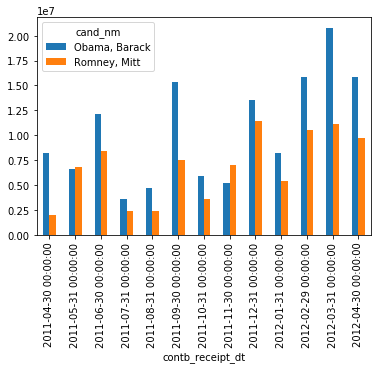

In [169]:
vs_m.plot(kind = 'bar')

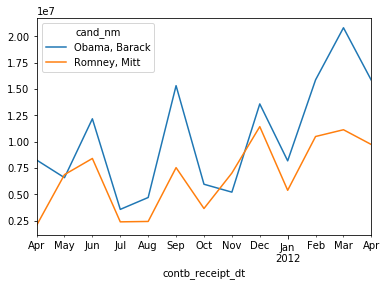

In [170]:
vs_m.plot(kind = 'line')

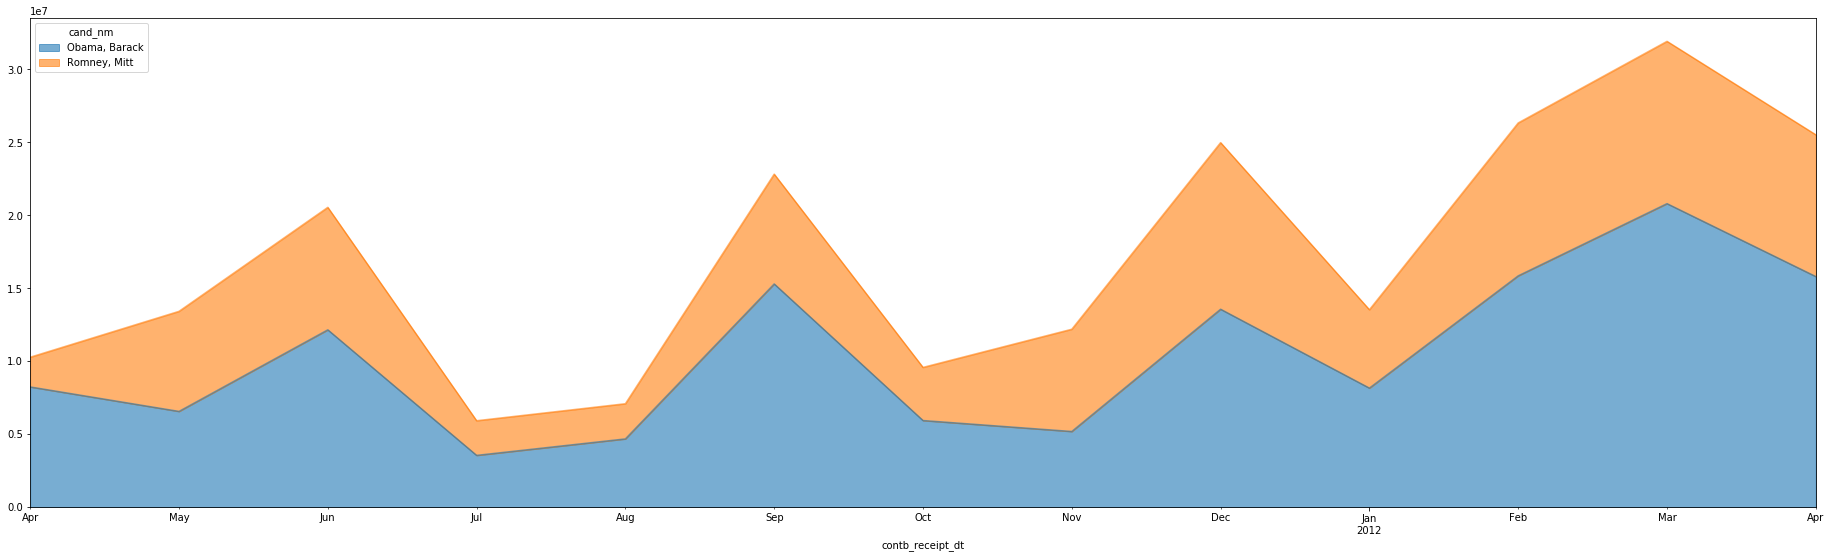

In [171]:
plt.figure(figsize = (32, 9))
ax = plt.subplot(1, 1, 1)
vs_m.plot(kind = 'area', ax = ax, alpha = 0.6)

### 5.各州支持率

In [172]:
#依据周和候选人进行分组
contb_vs.columns

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')

In [173]:
#依据周和候选人进行分组
state_vs = contb_vs.groupby(['cand_nm', 'contbr_st'])['contb_receipt_amt'].sum().unstack(level = 0)

In [175]:
state_vs

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,56405.00,135.00
AB,2048.00,NaN
AE,42973.75,5680.00
AK,281840.15,86204.24
AL,543123.48,527303.51
...,...,...
WI,1130155.46,270316.32
WV,169154.47,126725.12
WY,194046.74,252595.84


In [176]:
state_vs.fillna(0, inplace=True)

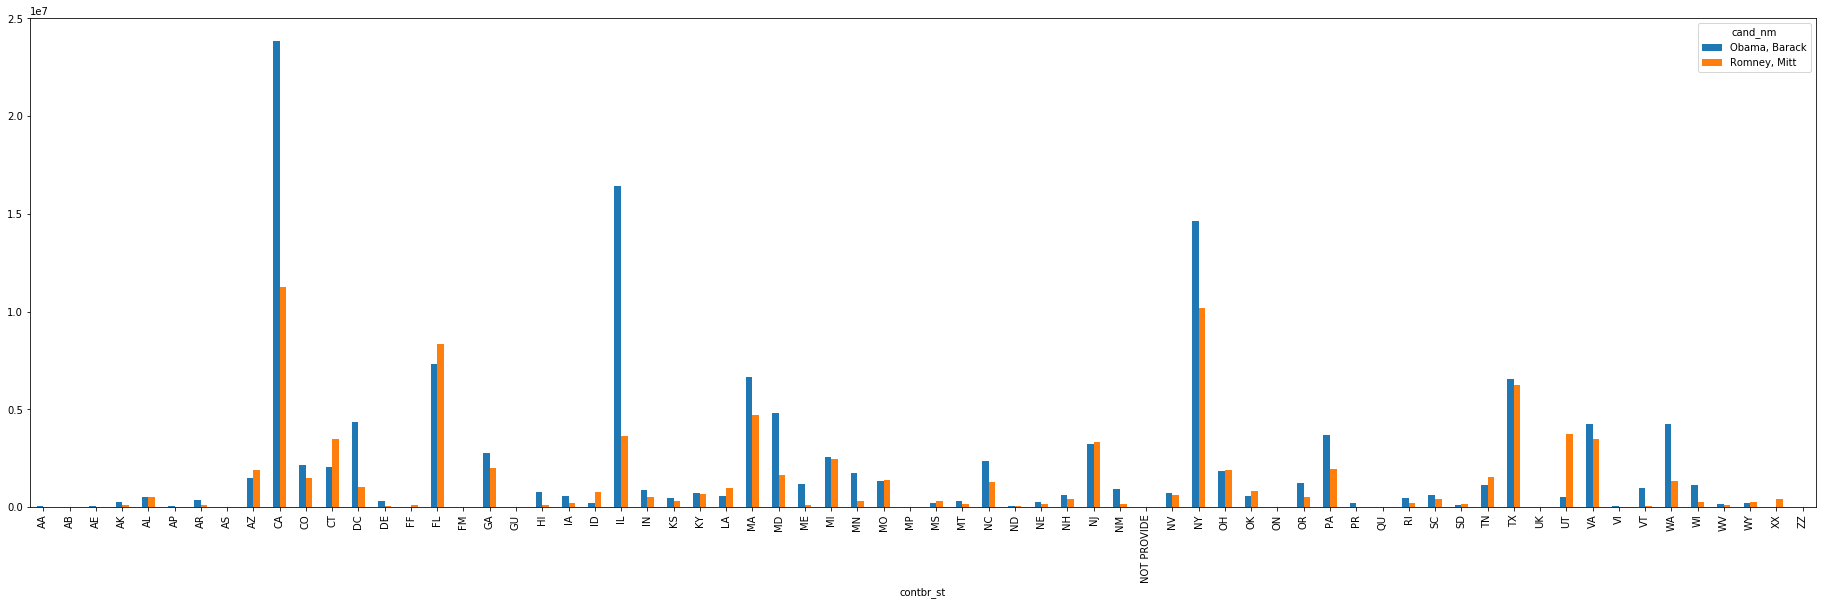

In [177]:
plt.figure(figsize = (32, 9))
ax = plt.subplot(1, 1, 1)
state_vs.plot(kind = 'bar',ax=ax)

In [181]:
state_vs_Rate = state_vs.div(state_vs.sum(axis = 1), axis = 0)
state_vs_Rate

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,0.997612,0.002388
AB,1.000000,0.000000
AE,0.883257,0.116743
AK,0.765778,0.234222
AL,0.507390,0.492610
...,...,...
WI,0.806982,0.193018
WV,0.571700,0.428300
WY,0.434456,0.565544


In [182]:
state_vs_Rate.drop(labels=['AA','AB','AE','NOT PROVIDE'], inplace = True)

In [180]:
pip install C:\Users\long\Downloads\pyproj-3.2.1-cp37-cp37m-win_amd64.whl

Processing c:\users\long\downloads\pyproj-3.2.1-cp37-cp37m-win_amd64.whl
pyproj is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\Anaconda\python.exe -m pip install --upgrade pip' command.


In [430]:
#basemape 工具包，
pip install 

SyntaxError: invalid syntax (<ipython-input-430-24a3f4d1e18e>, line 2)

In [183]:
import matplotlib.pyplot as plt 
%matplotlib inline
from mpl_toolkits.basemap import Basemap

In [184]:
state_vs_Rate

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AP,0.957329,0.042671
AR,0.772902,0.227098
AS,1.000000,0.000000
...,...,...
WI,0.806982,0.193018
WV,0.571700,0.428300
WY,0.434456,0.565544


In [193]:
oba = state_vs_Rate['Obama, Barack']

In [186]:
import numpy as np
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

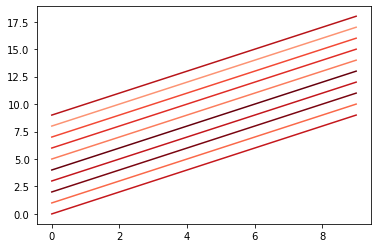

In [187]:
cmap = plt.cm.Reds
for i in range(10):
#     print((i + 1)/10)
    plt.plot(np.arange(10)+i,c = cmap(state_vs_Rate['Obama, Barack'].iloc[i]))


NameError: name 'm' is not defined

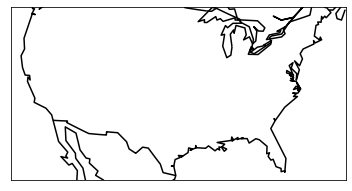

In [188]:
p = Basemap(llcrnrlon=-122, 
            llcrnrlat=23.41,
           urcrnrlon=-64,
           urcrnrlat= 45,
           projection='lcc',
           lat_1 = 30,
#            lat_2 = 35,
           lon_0 = -100)
p.drawcoastlines(linewidth = 1.5)
p.drawcountries(linewidth=1.5)
m.drawstates()
# p.readshapefile('./USA/gadm36_USA_1',name ='state')

plt.show()

In [488]:
str = "hello world see you tommorw"
str = str.split(' ')
for shape in m.states_info:
    str = shape['VARNAME_1']
    str = a.split('|')[0]
    print(oba[str,0])

KeyError: ('WY', 0)

In [516]:
oba = state_vs_Rate['Obama, Barack']
oba.shape

(64,)

In [494]:
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex

In [502]:
cmap(rate)

(0.9863437139561707, 0.49688581314878894, 0.37139561707035756, 1.0)

In [503]:
rate

0.4344564282250026

In [528]:
for shape in m.states_info:
    str = shape['VARNAME_1']
    str = str.split('|')[0]
    print(str)

AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
A

AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
A

ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
ME
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
M

In [195]:
abbr = {'Commonwealth of Kentucky': 'KY', 'Commonwealth of Massachusetts': 'MA',
       'Commonwealth of Pennsylvania':'PA',
       'State of Rhode Island and Providence Plantations': 'RI'}

(51,
 5,
 [-179.15055847, 18.9098587, 0.0, 0.0],
 [179.77340698, 72.6875, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x20b8f414b88>)

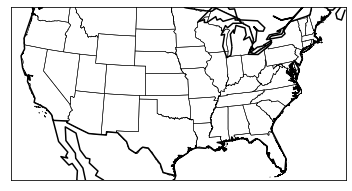

In [190]:
m = Basemap(llcrnrlon=-122, 
            llcrnrlat=23.41,
           urcrnrlon=-64,
           urcrnrlat= 45,
           projection='lcc',
           lat_1 = 30,
#            lat_2 = 35,
           lon_0 = -100)
m.drawcoastlines(linewidth = 1.5)
m.drawcountries(linewidth=1.5)
m.readshapefile('./USA/gadm36_USA_1',name ='states')


TypeError: 'Series' object is not callable

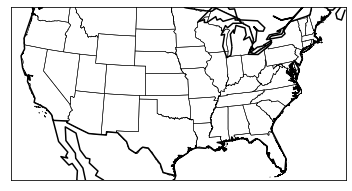

In [196]:

m = Basemap(llcrnrlon=-122, 
            llcrnrlat=23.41,
           urcrnrlon=-64,
           urcrnrlat= 45,
           projection='lcc',
           lat_1 = 30,
#            lat_2 = 35,
           lon_0 = -100)
m.drawcoastlines(linewidth = 1.5)
m.drawcountries(linewidth=1.5)
# m.drawstates()
# 地图读取了美国地图形状，m中就有隔周的形状，数据
m.readshapefile('./USA/gadm36_USA_1',name ='states')

colors = []
states = []
cmap = plt.cm.Reds
# 奥巴马的隔周支持率，支持率可以用来填充颜色
for shape in m.states_info:
    str = shape['VARNAME_1']
    str = str.split('|')[0]
    try:
    #     这个支持率就可以代表颜色
        rate = oba[str]
        colors.append(cmap(rate))
#         print(str)
        states.append(str)
    except:
#         
        colors.append(cmap(oba(abbr[str])))
        states.append(str)
#     print(a)
# 给州填充颜色，seg是一个多边形区域
ax = plt.gca()#当前图像
for n ,seg in enumerate(m.states):
    c = rgb2hex(colors[n])
    ploy = Polygon(seg, color = c)
    ax.add_patch(ploy)
plt.show()

In [532]:
states


['AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AL',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',

In [537]:
for i in states:
    print(i)

AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AL
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
A

AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
AK
A

LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
LA
L

In [496]:
#打印的是坐标位置以及形状,也就是每个周的经纬度
for n ,seg in enumerate(m.states):


TypeError: __init__() missing 1 required positional argument: 'xy'

In [474]:
for shape in m.states_info:
    print(shape['VARNAME_1'])

AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AL|Ala.
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Ala

AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska
AK|Alaska


ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
ME|Maine
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
MD
Commonwealth of Massachusetts|MA|Mass.
Commonwealth of Massachusetts|MA|Mass.
Commonwealth of Massachusetts|MA|Mass.
Commonwealth of Massachusetts|MA|Mass.
Commonwealth of Massachusetts|MA|Mass.
Commonwealth of Massachusetts|MA|Mass.
Commonwealth of Massachusetts|MA|Mass.
Commonwealth of Massachusetts|MA|Mass.
Commonwealth of Massachusetts|MA|Mass.
Commonwealth of Massachusetts|MA|Mass.
Commonwealth of Massachusetts|MA|Mass.
Commonwealth of Massachus